# 정상성

In [1]:
library(ggplot2)

In [4]:
data = read.csv('../input/air-passengers/AirPassengers.csv')
str(data)

'data.frame':	144 obs. of  2 variables:
 $ Month       : chr  "1949-01" "1949-02" "1949-03" "1949-04" ...
 $ X.Passengers: int  112 118 132 129 121 135 148 148 136 119 ...


## 1. 데이터 탐색 및 전처리

**시계열 데이터 변환**

data는 데이터프레임이므로 시계열 데이터로 만들어준다.

In [5]:
data_time = ts(data$X.Passengers, start=1949, frequency=12)
data_time

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


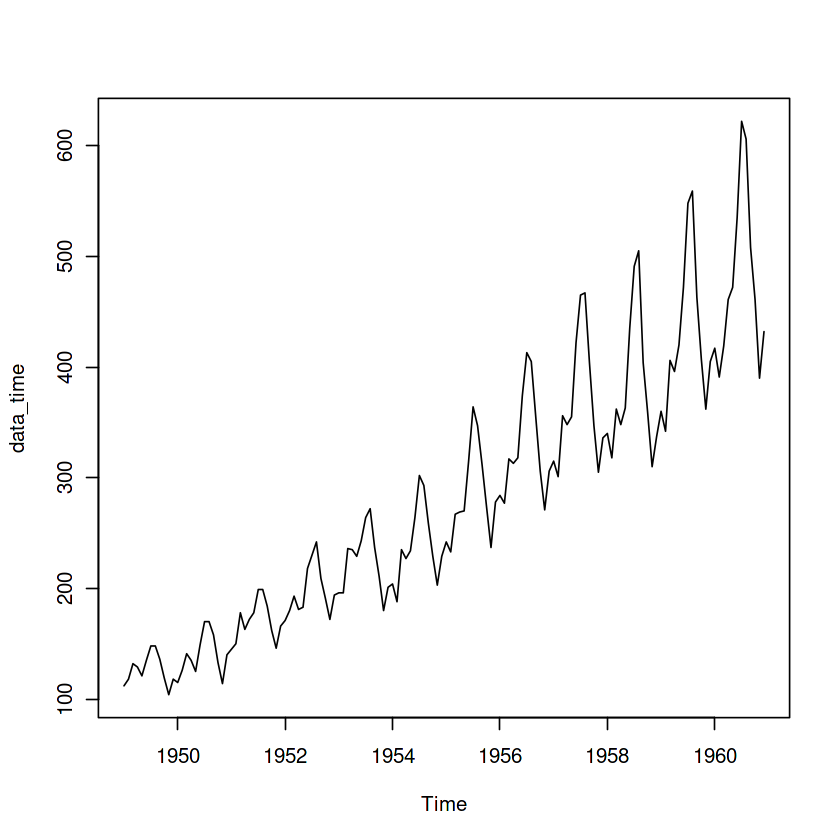

In [6]:
plot(data_time)

## 2. 정상성 변환

### 2-1. 로그 변환

시간에 따라 분산이 증가하므로 로그 변환 후 차분을 진행한다.

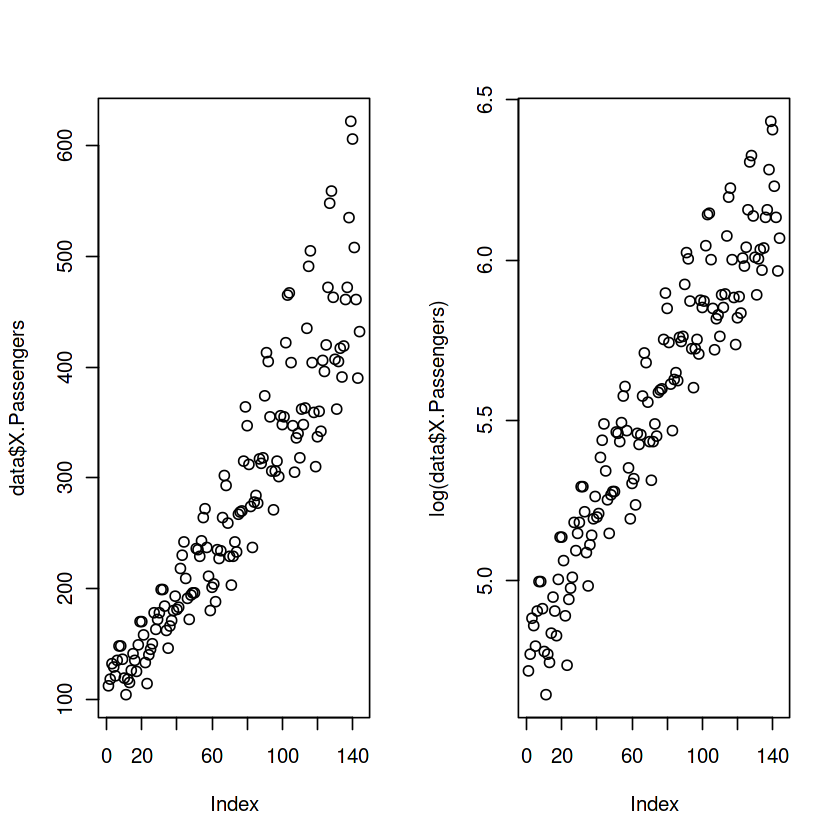

In [7]:
par(mfrow = c(1, 2))
plot(data$X.Passengers)
plot(log(data$X.Passengers))

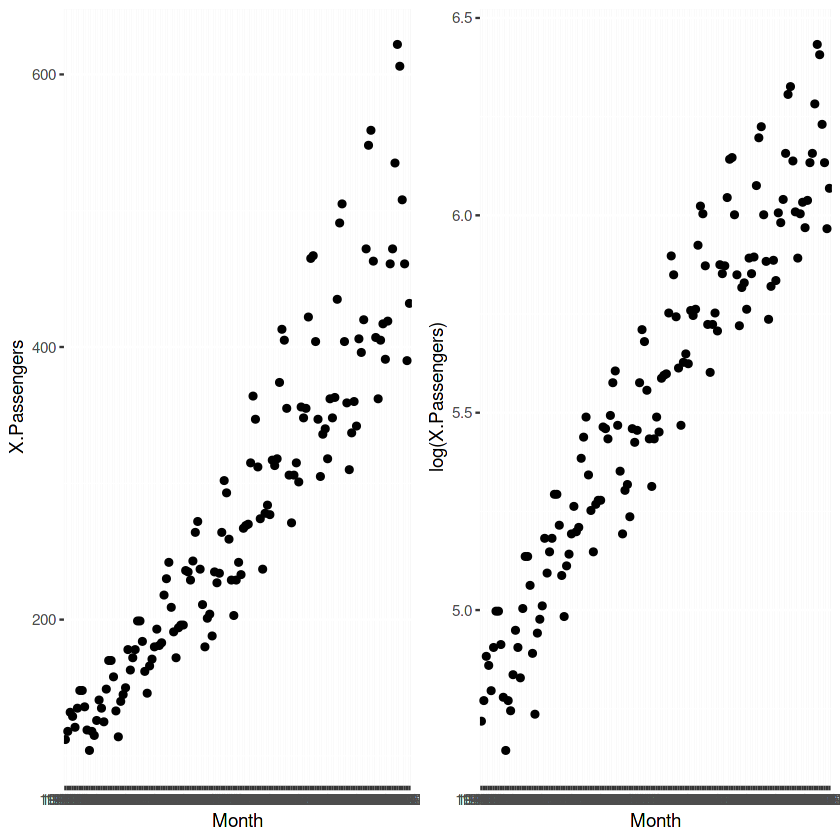

In [8]:
p1 = ggplot(data=data,aes(x=Month,y=X.Passengers))+geom_point()
p2 = ggplot(data=data,aes(x=Month,y=log(X.Passengers)))+geom_point()
ggpubr::ggarrange(p1, p2, ncol = 2, nrow = 1)

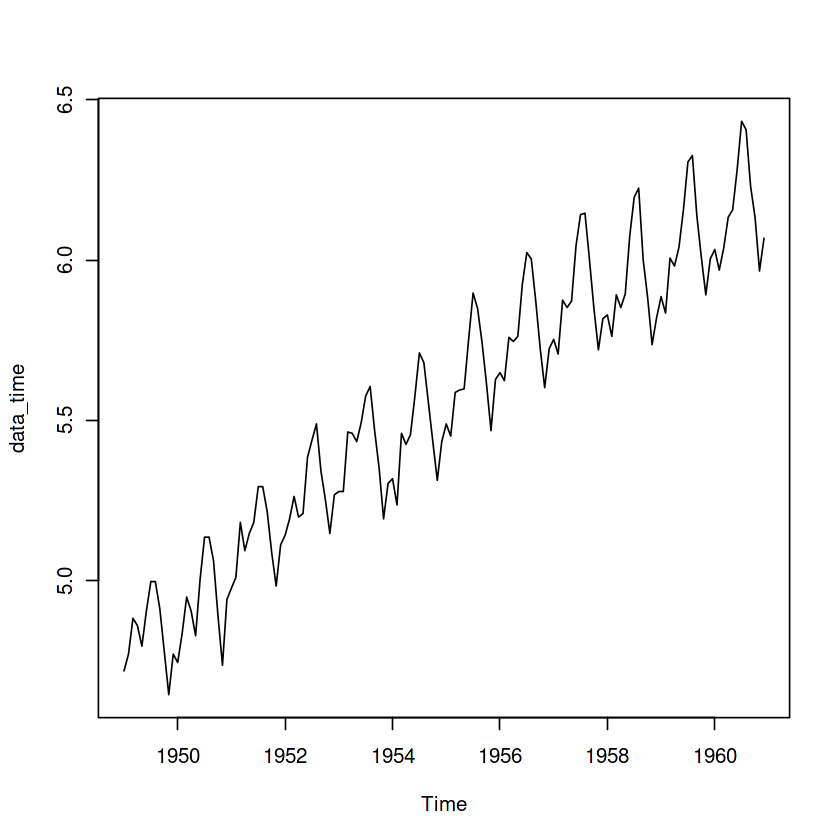

In [9]:
data_time = log(data_time)
plot(data_time)

### 2-2. 차분

차분을 통해 비정상 시계열을 정상적 시계열로 변환해준다.

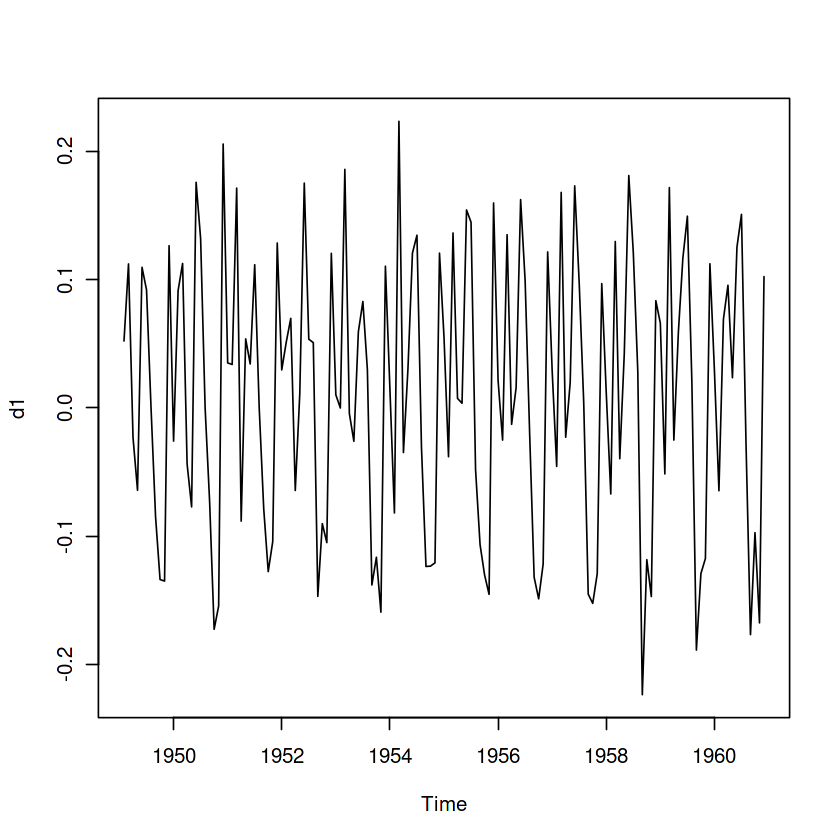

In [10]:
d1 <- diff(data_time)
plot(d1)

2차 차분은 다음과 같이 진행하는데 1차 차분 후에도 안정적인 형태이므로 1차 차분까지 진행한다.

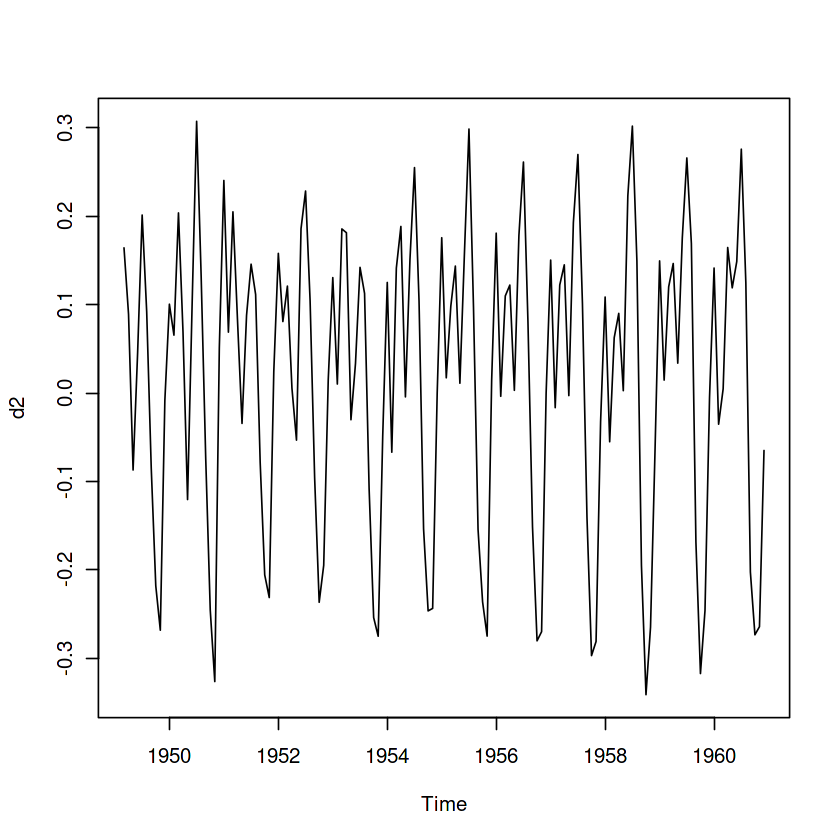

In [13]:
d2 <- diff(data_time, 2)
plot(d2)